## Preprocessing position for decoding

To decode, we need to:
1. Process position from pixel to cm; calculate speed. Table involved: IntervalPositionInfo
2. Linearize position (project 2D position to 1D track graph). Table involved: IntervalLinearizedPosition

In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
import spyglass as nd
import pandas as pd
import matplotlib.pyplot as plt
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common import IntervalList
from spyglass.common.common_position import IntervalPositionInfo
from spyglass.common.common_position import IntervalPositionInfoSelection
from spyglass.common.common_position import IntervalLinearizationSelection
from spyglass.common.common_position import IntervalLinearizedPosition
from spyglass.common.common_position import TrackGraph

### The only cell to be edited:

In [1]:
nwb_file_name = 'eliot20221016.nwb'

### Run the rest

In [4]:
from spyglass.common.common_nwbfile import Nwbfile
from spyglass.utils.nwb_helper_fn import get_all_spatial_series,get_nwb_file

In [6]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

IntervalList_pd=pd.DataFrame(IntervalList &
             {'nwb_file_name': nwb_copy_file_name})

# select position timestamps, only those on the track are selected
position_interval=[]
for i in IntervalList_pd.index:
    interval=IntervalList_pd['interval_list_name'][i]
    if interval[-8:-1]=='Session':
        position_interval.append('pos '+str(i)+' valid times')

# add default calculation parameters
for pos_intvl in position_interval:
    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default' #default parameters are in the database already
        }, skip_duplicates=True)

    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default_decoding' #upsampled for decoding, default parameters are in the database already
        }, skip_duplicates=True)

IntervalPositionInfo.populate({'nwb_file_name': nwb_copy_file_name})

IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`common_position`.`#interval_position_info_selection`, CONSTRAINT `#interval_position_info_selection_ibfk_2` FOREIGN KEY (`nwb_file_name`, `interval_list_name`) REFERENCES `common_interval`.`i)

In [8]:
position_interval

['pos 1 valid times',
 'pos 4 valid times',
 'pos 7 valid times',
 'pos 10 valid times',
 'pos 13 valid times']

In [30]:
for pos_intvl in position_interval:
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped 2023',
         'linearization_param_name': 'default'
        }, replace=True)
    
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default_decoding',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped 2023',
         'linearization_param_name': 'default'
        }, replace=True)

IntervalLinearizedPosition().populate({'nwb_file_name': nwb_copy_file_name})

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 1 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_OPJI755653.nwb


[2023-10-05 12:01:46,751][WARNING]: Skipped checksum for file with hash: 4e6279bf-f9f0-2d79-e815-7eb7bf69e05a, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_L9Q0G7M29U.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 11 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (101110, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (44754, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. 

Writing new NWB file eliot20221027_ZRNM4XJ92K.nwb


[2023-10-05 12:01:50,100][WARNING]: Skipped checksum for file with hash: 41ea5446-ae1a-3f5f-945d-83c165022345, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_WSPN3FV6IP.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 3 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_5PNRSC3LOF.nwb


[2023-10-05 12:01:52,201][WARNING]: Skipped checksum for file with hash: 91facd4e-fc4c-8cc8-dcc3-084bdc40dc56, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_PJXEWEKFHQ.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 5 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}
Writing new NWB file eliot20221027_SNCQOR3RHE.nwb


[2023-10-05 12:01:55,983][WARNING]: Skipped checksum for file with hash: 393e030f-3175-936e-23c5-41ac68273e38, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_9I18HQRIQ0.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 7 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (101110, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (44754, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (109736, 6) which is not compliant with NWB 2.5 and greater. The second dimension should hav

Writing new NWB file eliot20221027_J12PIOZ9Y4.nwb


[2023-10-05 12:01:58,285][WARNING]: Skipped checksum for file with hash: 3c07f062-5c16-1acc-240f-0db6d0d397a2, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_WNF1QV09NS.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 9 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_3QDQNCIA66.nwb


[2023-10-05 12:02:01,097][WARNING]: Skipped checksum for file with hash: 2b712d07-5bf6-9690-3468-7bb4a252fb5c, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_0GXGKM79CN.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 1 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (101110, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (44754, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (109736, 6) which is not compliant with NWB 2.5 and greater. The second dimension should hav

Writing new NWB file eliot20221027_WDOBLNOPAM.nwb


[2023-10-05 12:02:03,175][WARNING]: Skipped checksum for file with hash: c82e5cf5-3539-f961-6470-2c6e7b236320, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_0W4HP7NXMV.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 11 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (101110, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (44754, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (109736, 6) which is not compliant with NWB 2.5 and greater. The second dimension should hav

Writing new NWB file eliot20221027_UI9DT7ZDNG.nwb


[2023-10-05 12:02:16,930][WARNING]: Skipped checksum for file with hash: ffbcb929-d88b-7d33-f2d8-d386c50babee, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_G8R4Z9MJ34.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 3 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_JRRU62496R.nwb


[2023-10-05 12:02:28,576][WARNING]: Skipped checksum for file with hash: 08283496-b15a-22b1-92fa-2d7bab6f3568, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_UHTXR8SFID.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 5 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (101110, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (44754, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (109736, 6) which is not compliant with NWB 2.5 and greater. The second dimension should hav

Writing new NWB file eliot20221027_OEOHW351TE.nwb


[2023-10-05 12:02:40,848][WARNING]: Skipped checksum for file with hash: 3ca1b237-6098-82de-dc68-468c91c5f517, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_6C0B4C4E6Y.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 7 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_NS5S36N32D.nwb


[2023-10-05 12:02:52,551][WARNING]: Skipped checksum for file with hash: 5199fdd1-ec0a-87d1-b472-7d6685cf0558, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_XLMQEQO2XJ.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221027_.nwb', 'interval_list_name': 'pos 9 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221027_KFBASWVA1E.nwb


[2023-10-05 12:03:03,826][WARNING]: Skipped checksum for file with hash: 654c680e-88ea-384b-e010-996b8e125852, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_GZE6PBKM9V.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

In [31]:
IntervalLinearizedPosition & {'nwb_file_name': nwb_copy_file_name}

position_info_param_name name for this set of parameters,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,track_graph_name,linearization_param_name name for this set of parameters,analysis_file_name name of the file,linearized_position_object_id
default,eliot20221027_.nwb,pos 1 valid times,4 arm lumped 2023,default,eliot20221027_OPJI755653.nwb,ba8d00c8-3c92-40ee-b386-9e7aa36af8a9
default,eliot20221027_.nwb,pos 11 valid times,4 arm lumped 2023,default,eliot20221027_ZRNM4XJ92K.nwb,4f635495-4ffa-40c8-8cdd-c87df59e441e
default,eliot20221027_.nwb,pos 3 valid times,4 arm lumped 2023,default,eliot20221027_5PNRSC3LOF.nwb,b5877ea1-79ef-49e1-b80c-f8c0efc0c267
default,eliot20221027_.nwb,pos 5 valid times,4 arm lumped 2023,default,eliot20221027_SNCQOR3RHE.nwb,1a953d04-2d29-45b2-9453-5aca83a7aec3
default,eliot20221027_.nwb,pos 7 valid times,4 arm lumped 2023,default,eliot20221027_J12PIOZ9Y4.nwb,585921db-c742-4ffd-96f8-595bca49ff74
default,eliot20221027_.nwb,pos 9 valid times,4 arm lumped 2023,default,eliot20221027_3QDQNCIA66.nwb,40c66690-59ce-42dc-b8f8-f1e6688702ed
default_decoding,eliot20221027_.nwb,pos 1 valid times,4 arm lumped 2023,default,eliot20221027_WDOBLNOPAM.nwb,e38f111e-5719-4957-b2ec-a3acd211ccd9
default_decoding,eliot20221027_.nwb,pos 11 valid times,4 arm lumped 2023,default,eliot20221027_UI9DT7ZDNG.nwb,32305c0f-5ae9-435d-bf80-b01944ade356
default_decoding,eliot20221027_.nwb,pos 3 valid times,4 arm lumped 2023,default,eliot20221027_JRRU62496R.nwb,d6fbdf68-01cd-4b79-bb06-92b222aeb724
default_decoding,eliot20221027_.nwb,pos 5 valid times,4 arm lumped 2023,default,eliot20221027_OEOHW351TE.nwb,5f6121e0-84d4-4ab5-8376-9b11dee68b84


#### check one interval

[2023-10-05 12:03:15,129][WARNING]: Skipped checksum for file with hash: 2f115aef-6f8e-f72b-5512-71752949a642, and path: /stelmo/nwb/analysis/eliot20221027/eliot20221027_OPJI755653.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

Text(0.5, 1.0, 'Linear Position')

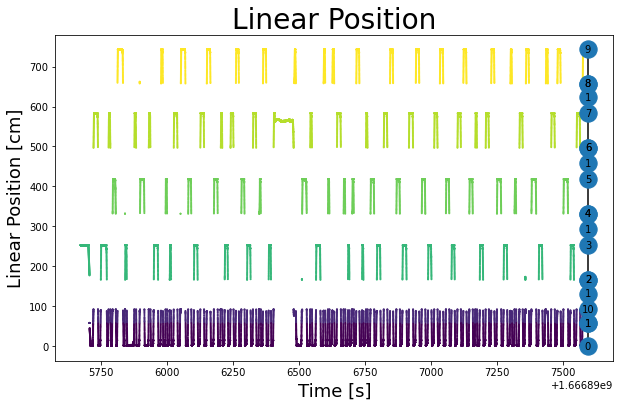

In [32]:
graph = TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}

linear_position_df= (IntervalLinearizedPosition() &
                     {'position_info_param_name': 'default',
                      'nwb_file_name': nwb_copy_file_name,
                      'interval_list_name': 'pos 1 valid times',
                      'track_graph_name': '4 arm lumped 2023',
                      'linearization_param_name': 'default',
                     }).fetch1_dataframe()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(linear_position_df.index,
            linear_position_df.linear_position,
            c=linear_position_df.track_segment_id,
            s=1)
graph.plot_track_graph_as_1D(
    ax=ax,
    axis='y',
    other_axis_start=linear_position_df.index[-1] + 10)

ax.set_xlabel('Time [s]', fontsize=18)
ax.set_ylabel('Linear Position [cm]', fontsize=18)
ax.set_title('Linear Position', fontsize=28)

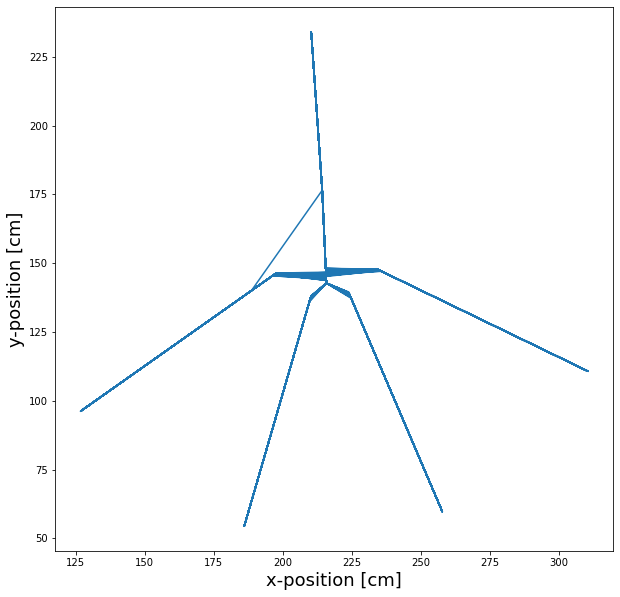

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.plot(position_info.head_position_x, position_info.head_position_y,
#        color='lightgrey', alpha=0.7, zorder=0)
ax.set_xlabel('x-position [cm]', fontsize=18)
ax.set_ylabel('y-position [cm]', fontsize=18)
ax.plot(linear_position_df.projected_x_position, linear_position_df.projected_y_position)